In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import random #for kmeans random selection of first mean within the set

In [3]:
df = pd.read_csv('Dataminers_2021H2.csv')

In [4]:
df = df.drop(columns = 'Timestamp') #remove TimeStamp as it's not needed

In [5]:
#just checking data tyopes
print(type(df))
df.dtypes

<class 'pandas.core.frame.DataFrame'>


Shoe                                     float64
Which programme are you studying?         object
Your height (in International inches)    float64
Why are you taking this course?           object
dtype: object

# Cleaning and Preparing DATA

In [6]:
#checking odd inputs and converting from cm or feet to inches. If input is nul, replace it with mean
for x in range(len(df['Your height (in International inches)'])):
    if df['Your height (in International inches)'][x] > 80:
        df['Your height (in International inches)'][x] = df['Your height (in International inches)'][x]*0.3937
    if df['Your height (in International inches)'][x] < 10:
        df['Your height (in International inches)'][x] = df['Your height (in International inches)'][x]*12
    if df['Your height (in International inches)'][x] == 0:
        df['Your height (in International inches)'][x] = df['Your height (in International inches)'].mean()

C:\Users\migue\AppData\Local\Temp\ipykernel_12292\3306461330.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Your height (in International inches)'][x] = df['Your height (in International inches)'][x]*0.3937
C:\Users\migue\AppData\Local\Temp\ipykernel_12292\3306461330.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Your height (in International inches)'][x] = df['Your height (in International inches)'][x]*12
C:\Users\migue\AppData\Local\Temp\ipykernel_12292\3306461330.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: h

In [7]:
#formating float for clarity
df['Your height (in International inches)'] = df['Your height (in International inches)'].map('{:.2f}'.format) 

In [8]:
#changing data type for formating and manipulation
df['Shoe'] = df['Shoe'].astype(int)
df['Your height (in International inches)'] = df['Your height (in International inches)'].astype(float)

In [9]:
#Why are you taking this course? (;) > as we have multiple answers on each input and we are interested on each value
#let's create a new dataframe with all the information.
#dfWhy = df['Why are you taking this course?']

dfWhyTakingCourse = []

for x in range(len(df['Why are you taking this course?'])):
    dfWhyTakingCourse.append(df['Why are you taking this course?'][x].split(';'))
    
newDfWhyTakingCourse = []
for l in dfWhyTakingCourse:
    newDfWhyTakingCourse.append([x.split(',') for x in l]) 

flat_list = []
for sublist in newDfWhyTakingCourse:
    for item in sublist:
        flat_list.append(item)
        
df2 = flat_list
df2 = pd.DataFrame(df2)

df2['Why Taking This Course'] = df2[0]
df2 = df2.drop([0, 1], axis=1)

#df2

# EDA
### at the moment I have two DataFrames to work with: df and df2
#### Lets plot them!

Shoe mean: 40.96


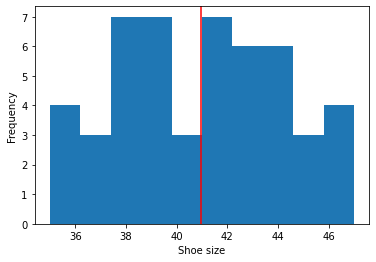

In [10]:
df['Shoe'].plot(kind='hist', bins=10) #bins=[35, 37, 39, 41, 43, 45, 47])
plt.xlabel('Shoe size')
plt.axvline(df['Shoe'].mean(), color='red', label = 'shoe mean' )
print(f"Shoe mean: {df['Shoe'].mean()}")

Height mean: 69.86460000000001


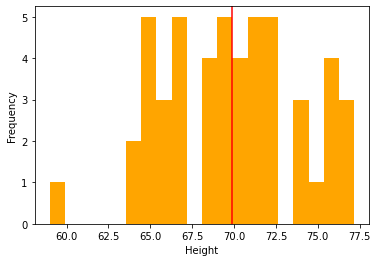

In [11]:
df['Your height (in International inches)'].plot(kind='hist', color= 'orange', bins=20)
plt.xlabel('Height')
plt.axvline(df['Your height (in International inches)'].mean(), color='red', label = 'height mean' )
print(f"Height mean: {df['Your height (in International inches)'].mean()}")

<AxesSubplot:>

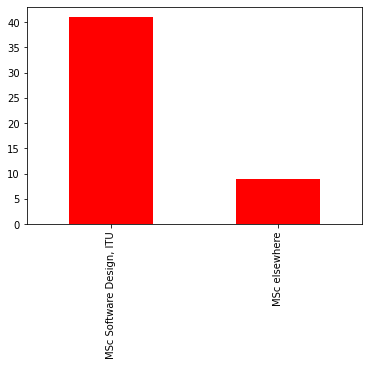

In [12]:
df['Which programme are you studying?'].value_counts().plot(kind='bar', color='red')

<AxesSubplot:>

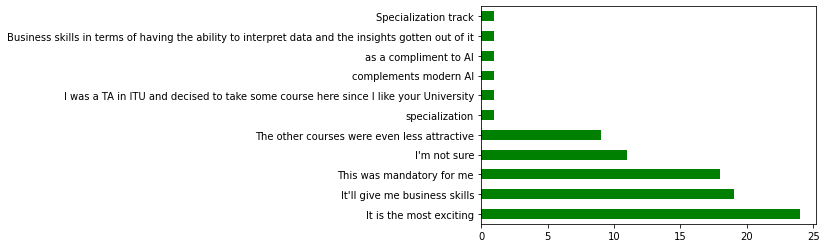

In [13]:
df2['Why Taking This Course'].value_counts().plot(kind='barh', color='green')

In [14]:
#Normalizing Data for kmeans interpretation (?) just in case on a different df
dfKmeans1 = df.copy()
#dfKmeans1['Shoe'] = dfKmeans1['Shoe']/max(dfKmeans1['Shoe'])
#dfKmeans1['Your height (in International inches)'] = dfKmeans1['Your height (in International inches)'] / max(dfKmeans1['Your height (in International inches)']) 

In [15]:
#and what about the relation between Which program are you studying and Why are you taking this course?
#I will create a DataFrame where every answer from Why becomes an element, and copy for each element wich program
#is the student studying to create a proper relation for each data point.
df3 =[]
df3 = pd.DataFrame(df3)
dfToAppend = pd.DataFrame(newDfWhyTakingCourse) #to merge with main dataframe
df3 = pd.concat([df, dfToAppend], axis=1)

In [16]:
#type(df3[1][1]) #Which type is my element called None?
for x in range(5):
    for y in range(len(df3)):
        if type(df3[x][y]) != list:
            df3[x][y] = 0 #easier to operate with value 0

#df3

C:\Users\migue\AppData\Local\Temp\ipykernel_12292\1192306987.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[x][y] = 0 #easier to operate with value 0


In [17]:
dfKmeans2 =[[],[]]

for x in range(5):
    for y in range(len(df3)):
        if df3[x][y] != 0:
            dfKmeans2[0].append(df3['Which programme are you studying?'][y])
            dfKmeans2[1].append(df3[x][y])

dfKmeans2 = pd.DataFrame(dfKmeans2)
dfKmeans2 = np.transpose(dfKmeans2)

dfKmeans2 = dfKmeans2.rename({0: 'Which programme are you studying?', 1: 'Why are you taking this course?'}, axis=1)
dfKmeans2['Why are you taking this course?'] = dfKmeans2['Why are you taking this course?'].astype(str)

#chars_to_remove = str('["', '"]', "['", "']")
#dfKmeans2.iloc[row]
for row in range(len(dfKmeans2['Why are you taking this course?'])):
    dfKmeans2['Why are you taking this course?'][row] = dfKmeans2['Why are you taking this course?'][row].replace('["', '')
    dfKmeans2['Why are you taking this course?'][row] = dfKmeans2['Why are you taking this course?'][row].replace('"]', '')
    dfKmeans2['Why are you taking this course?'][row] = dfKmeans2['Why are you taking this course?'][row].replace("['", '')
    dfKmeans2['Why are you taking this course?'][row] = dfKmeans2['Why are you taking this course?'][row].replace("']", '')
    dfKmeans2['Why are you taking this course?'][row] = dfKmeans2['Why are you taking this course?'][row].replace('"', '')
    dfKmeans2['Why are you taking this course?'][row] = dfKmeans2['Why are you taking this course?'][row].replace("specialization", 'Specialization track')
    dfKmeans2['Why are you taking this course?'][row] = dfKmeans2['Why are you taking this course?'][row].replace("Business skills in terms of having the ability to interpret data and the insights gotten out of it", "It'll give me business skills")
    dfKmeans2['Why are you taking this course?'][row] = dfKmeans2['Why are you taking this course?'][row].replace("complements modern AI', ' hopefully", 'as a compliment to AI')
    dfKmeans2['Why are you taking this course?'][row] = dfKmeans2['Why are you taking this course?'][row].replace("I was a TA in ITU and decised to take some course here since I like your University", 'I was a TA in ITU')

#dfKmeans2

<AxesSubplot:ylabel='Which programme are you studying?,Why are you taking this course?'>

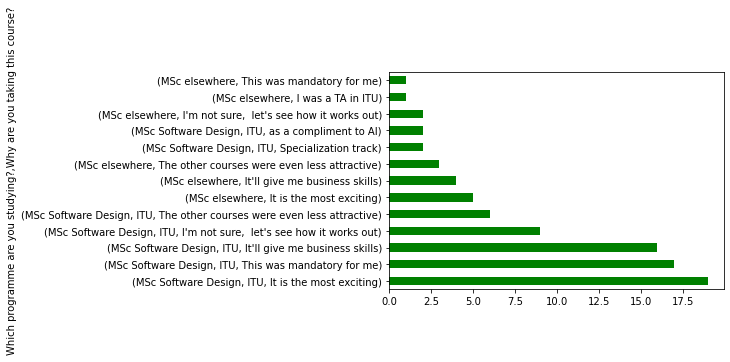

In [18]:
#check the plot
#dfKmeans2
dfKmeans2.value_counts().plot(kind='barh', color='green')

In [19]:
#Some extra organization for the why behind each program
dfSoftwareDesign = [[],[]]
dfMscEsewhere = [[],[]]

for element in range(len(dfKmeans2['Which programme are you studying?'])):
    if dfKmeans2['Which programme are you studying?'][element] == "MSc Software Design, ITU":
        dfSoftwareDesign[0].append(dfKmeans2['Which programme are you studying?'][element])
        dfSoftwareDesign[1].append(dfKmeans2['Why are you taking this course?'][element])
    else:
        dfMscEsewhere[0].append(dfKmeans2['Which programme are you studying?'][element])
        dfMscEsewhere[1].append(dfKmeans2['Why are you taking this course?'][element])
        
dfSoftwareDesign = pd.DataFrame(dfSoftwareDesign)
dfMscEsewhere = pd.DataFrame(dfMscEsewhere)
dfSoftwareDesign = np.transpose(dfSoftwareDesign)
dfMscEsewhere = np.transpose(dfMscEsewhere)

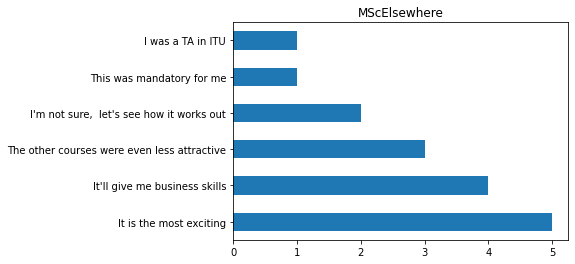

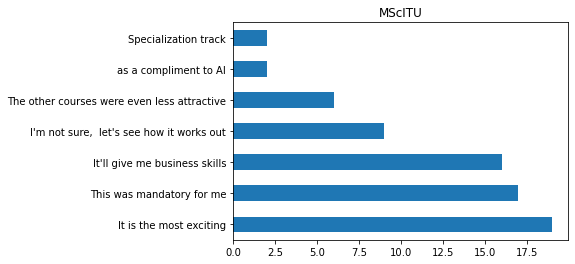

In [20]:
#check that plot
dfMscEsewhere[1].value_counts().plot(kind='barh')
plt.title('MScElsewhere')
plt.show()
dfSoftwareDesign[1].value_counts().plot(kind='barh')
plt.title('MScITU')
plt.show()

#  K-means from scratch! > Unsupervised >


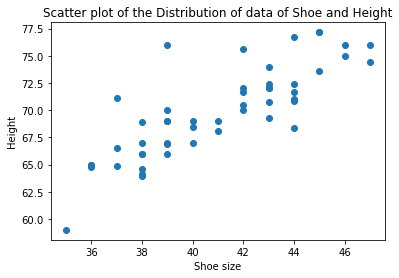

In [21]:
#Is there a relation between shoe size and height?
plt.title('Scatter plot of the Distribution of data of Shoe and Height')
plt.scatter(dfKmeans1['Shoe'], dfKmeans1['Your height (in International inches)'])
plt.xlabel('Shoe size')
plt.ylabel('Height')
plt.show()

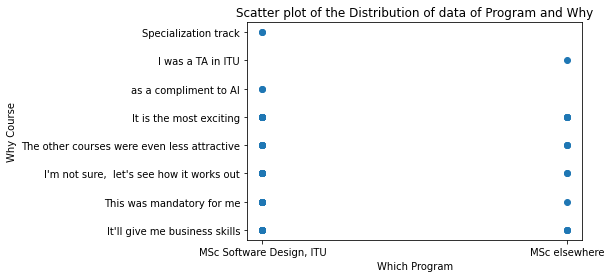

In [22]:
#this one is not saying much
plt.title('Scatter plot of the Distribution of data of Program and Why')
plt.scatter(dfKmeans2['Which programme are you studying?'], dfKmeans2['Why are you taking this course?'])
plt.xlabel('Which Program')
plt.ylabel('Why Course')
plt.show()

### shoe and height data on KMeans

In [23]:
dfKmeans1['class'] = 1 #for mean assignment

In [24]:
#choosing two random centers to make the first distance calculations
def initializeMeans(dataf):
    means = [random.randint(0,len(dataf)), random.randint(0,len(dataf))] 
    mean1 = dataf.iloc[means[0]]
    mean2 = dataf.iloc[means[1]]
    return mean1, mean2

In [25]:
#claculate the euclidean distance to both centers and change the classification to 1 or 2, depending the shortest distance
def euclideanDist(dataf,pointIDX,mean1,mean2):
    point = dataf.iloc[pointIDX]
    dist1 = np.sqrt(((float(point["Shoe"])-float(mean1["Shoe"]))**2 + (float(point["Your height (in International inches)"])-float(mean1["Your height (in International inches)"]))**2 ))
    dist2 = np.sqrt(((float(point["Shoe"])-float(mean2["Shoe"]))**2 + (float(point["Your height (in International inches)"])-float(mean2["Your height (in International inches)"]))**2 ))
    if dist1 < dist2:
        dataf.at[pointIDX,"class"] = 1
    else:
        dataf.at[pointIDX,"class"] = 2
        
    return dataf

In [26]:
#once sorted out, calculate the new mean in regards of the classification done with eucideanDist function
def updateMean(dataf):
    mean1 = dataf[dataf["class"] == 1].mean()
    mean2 = dataf[dataf["class"] == 2].mean()
    
    return mean1,mean2

In [27]:
#a function that uses the previous def a number of times (iterations), claculating distance and updating the mean 
def Kmeans(dataf,iterations):
    mean1,mean2 = initializeMeans(dataf)

    for iteration in range(iterations):

        print("Iteration {}/{}".format(iteration,iterations))
        
        for i in range(len(dataf)):
            dataf = euclideanDist(dataf,i,mean1,mean2)
            
        mean1,mean2 = updateMean(dataf)
        
    return dataf, mean1, mean2

In [28]:
dfKmeans, mean1, mean2 = Kmeans(dfKmeans1,4) #with 4 itirations seems to find the right clustering

Iteration 0/4
Iteration 1/4
Iteration 2/4
Iteration 3/4


C:\Users\migue\AppData\Local\Temp\ipykernel_12292\3327392348.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean1 = dataf[dataf["class"] == 1].mean()
C:\Users\migue\AppData\Local\Temp\ipykernel_12292\3327392348.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean2 = dataf[dataf["class"] == 2].mean()


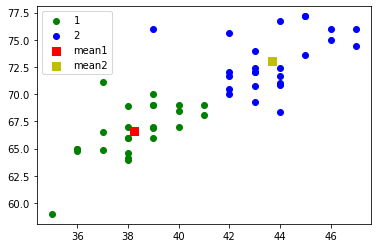

In [29]:
plt.clf()
plt.scatter(dfKmeans.loc[dfKmeans['class'] == 1]['Shoe'],dfKmeans.loc[dfKmeans['class'] == 1]['Your height (in International inches)'],color='g',label='1')  
plt.scatter(dfKmeans.loc[dfKmeans['class'] == 2]['Shoe'],dfKmeans.loc[dfKmeans['class'] == 2]['Your height (in International inches)'],color='b',label='2')  
                                                                                                            
plt.scatter(mean1['Shoe'],mean1['Your height (in International inches)'],s=70,label='mean1',marker='s',color='r')                    
plt.scatter(mean2['Shoe'],mean2['Your height (in International inches)'],s=70,label='mean2',marker='s',color='y')                    
                                                                                                            
plt.legend()                                                                                                
plt.show()                                                                                                  

In [30]:
g1ShoeMax = dfKmeans.loc[dfKmeans['class'] == 1]['Shoe'].max()
g1ShoeMin = dfKmeans.loc[dfKmeans['class'] == 1]['Shoe'].min()
g1ShoeMean = mean1['Shoe']

g1HeightMax = dfKmeans.loc[dfKmeans['class'] == 1]['Your height (in International inches)'].max()
g1HeightMin = dfKmeans.loc[dfKmeans['class'] == 1]['Your height (in International inches)'].min()
g1HeightMean = mean1['Your height (in International inches)']

g2ShoeMax = dfKmeans.loc[dfKmeans['class'] == 2]['Shoe'].max()
g2ShoeMin = dfKmeans.loc[dfKmeans['class'] == 2]['Shoe'].min()
g2ShoeMean = mean2['Shoe']

g2HeightMax = dfKmeans.loc[dfKmeans['class'] == 2]['Your height (in International inches)'].max()
g2HeightMin = dfKmeans.loc[dfKmeans['class'] == 2]['Your height (in International inches)'].min()
g2HeightMean = mean2['Your height (in International inches)']

print('GROUP 1:')
print(f'max shoe size: {g1ShoeMax}')
print(f'min shoe size: {g1ShoeMin}')
print(f'shoe size mean: {g1ShoeMean}')
print()
print(f'max height size: {g1HeightMax}')
print(f'min height size: {g1HeightMin}')
print(f'height size mean: {g1HeightMean}')
print()
print('GROUP 2:')
print(f'max shoe size: {g2ShoeMax}')
print(f'min shoe size: {g2ShoeMin}')
print(f'shoe size mean: {g2ShoeMean}')
print()
print(f'max height size: {g2HeightMax}')
print(f'min height size: {g2HeightMin}')
print(f'height size mean: {g2HeightMean}')


GROUP 1:
max shoe size: 41
min shoe size: 35
shoe size mean: 38.24

max height size: 71.17
min height size: 59.0
height size mean: 66.6596

GROUP 2:
max shoe size: 47
min shoe size: 39
shoe size mean: 43.68

max height size: 77.17
min height size: 68.4
height size mean: 73.06960000000002


# Naive Bayes from scratch! > Unsupervised >

Step 1: Separate By Class

First, we need to separate our training data by class

In [31]:
#just in case a new DataFrame for Naive Bayes
dfNaiveBayes = df.copy()
dfNaiveBayes['class'] = 1

dfNaiveBayes2 = dfKmeans2.copy()
dfNaiveBayes2['class'] = 1

#do I need any of the other DataFrames: df2? df3? dfKmeans1? dfKmeans2? dfMscEsewhere? dfSoftwareDesign?
#dfNaiveBayes = dfNaiveBayes.drop(['class'], axis=1)

I would like to predict "Which program are you taking?" given the data set

In [32]:
####Clasify our existing data
def classify_data(dataset):
    for i in range(len(dataset)):
        class_info = dataset['Which programme are you studying?'][i] #category 1 or 2
        if class_info == "MSc Software Design, ITU": #which categorization I'm trying to find
            dataset['class'][i] = 1
        else:
            dataset['class'][i] = 2

In [33]:
def separate_by_class(dataset):
    classify_data(dataset)
    separated_number = {1:[],2:[]}
    separated_string = {1:[],2:[]}
    
    tempDf_num = pd.DataFrame()
    tempDf_str = pd.DataFrame()
    
    for col in dataset.columns:
        if type(dataset.iloc[0][col]) != str:
            tempDf_num = tempDf_num.append(dataset[col])
        else: 
            tempDf_str = tempDf_str.append(dataset[col])
    tempDf_str = tempDf_str.append(dataset['class'])
            
    tempDf_num = np.transpose(tempDf_num)
    tempDf_str = np.transpose(tempDf_str)
    
    for i in range(len(tempDf_num)):
        class_value_n = tempDf_num['class'][i]
        if tempDf_num['class'][i] == 1:
            separated_number[class_value_n].append(tempDf_num.iloc[i])
        else:
            separated_number[class_value_n].append(tempDf_num.iloc[i])
    
    for i in range(len(tempDf_str)):
        class_value_s = tempDf_str['class'][i]
        if tempDf_str['class'][i] == 1:
            separated_string[class_value_s].append(tempDf_str.iloc[i])
        else:
            separated_string[class_value_s].append(tempDf_str.iloc[i])
    
    return separated_number, separated_string

Step 2: Summarize Dataset

In [34]:
#calculate likelihood in categorical data
def calculate_likelyhood(dataset):
    nouse, separated_string = separate_by_class(dataset)
    class1 = pd.DataFrame(separated_string[1])
    class2 = pd.DataFrame(separated_string[2])
    likelyhood1 = pd.DataFrame()
    likelyhood2 = pd.DataFrame()
    
    value_counts1 = class1['Why are you taking this course?'].value_counts()
    val_counts1 = pd.DataFrame(value_counts1)
    likelyhood1 = val_counts1.reset_index()
    likelyhood1.columns = ['Why', 'count']
    
    value_counts2 = class2['Why are you taking this course?'].value_counts()
    val_counts2 = pd.DataFrame(value_counts2)
    likelyhood2 = val_counts2.reset_index()
    likelyhood2.columns = ['Why', 'count']
    
    sumLikelyhood1 = sum(likelyhood1['count'])
    sumLikelyhood2 = sum(likelyhood2['count'])
    likelyhood1['Likelyhood'] = float(1)
    likelyhood2['Likelyhood'] = float(1)
    
    for row in range(len(likelyhood1['count'])):
        likelyhood1['Likelyhood'][row] = likelyhood1['count'][row] / sumLikelyhood1
    for row in range(len(likelyhood2['count'])):
        likelyhood2['Likelyhood'][row] = likelyhood2['count'][row] / sumLikelyhood2
    
    likelyhood1 = likelyhood1.drop('count', 1)
    likelyhood1 = np.transpose(likelyhood1)
    likelyhood1.columns = likelyhood1.iloc[0]
    likelyhood1 = likelyhood1.drop(likelyhood1.index[0])
    likelyhood1['class'] = 1
    
    likelyhood2 = likelyhood2.drop('count', 1)
    likelyhood2 = np.transpose(likelyhood2)
    likelyhood2.columns = likelyhood2.iloc[0]
    likelyhood2 = likelyhood2.drop(likelyhood2.index[0])
    likelyhood2['class'] = 2
    
    likelyhoods = pd.concat([likelyhood1, likelyhood2])
    
    #cols = list(likelyhoods.columns.values) #Make a list of all of the columns in the df
    #cols.pop(cols.index('class')) #Remove b from list
    #likelyhoods = likelyhoods[cols+['class']] #Create new dataframe with columns in the order you want
    
    likelyhoods = likelyhoods.fillna(0)
    likelyhoods = likelyhoods + 1
    likelyhoods['class'] = likelyhoods['class'] -1
    
    likelyhoods = likelyhoods.set_index('class')
    
    return likelyhoods #for loop should be create after I concatenate both dataframes 

In [35]:
#calculate mean if colum != string (numerical data)
def calculate_mean(dataset):
    separated_number, nouse = separate_by_class(dataset)
    class1 = pd.DataFrame(separated_number[1])
    class2 = pd.DataFrame(separated_number[2])
    
    mean1 = class1.mean()
    mean2 = class2.mean()
    
    mean1 = pd.DataFrame(mean1)
    mean1 = np.transpose(mean1)
    mean2 = pd.DataFrame(mean2)
    mean2 = np.transpose(mean2)
    
    mean1['class'] = 1
    mean2['class'] = 2
    
    mean1 = mean1.add_suffix('_mean') #could be improved with a for loop
    mean1 = mean1.rename({'class_mean' : 'class'}, axis=1) 
    mean2 = mean2.add_suffix('_mean')
    mean2 = mean2.rename({'class_mean' : 'class'}, axis=1)
    
    means = pd.concat([mean1,mean2])
    means = means.set_index('class')
    
    return means #mean1, mean2, 

In [36]:
#calculate standard deviation
def calculate_stdev(dataset):
    separated_number, nouse = separate_by_class(dataset)
    class1 = pd.DataFrame(separated_number[1])
    class2 = pd.DataFrame(separated_number[2])
    
    stdev1 = class1.std()
    stdev2 = class2.std()
    
    stdev1 = pd.DataFrame(stdev1)
    stdev1 = np.transpose(stdev1)
    stdev2 = pd.DataFrame(stdev2)
    stdev2 = np.transpose(stdev2)
    
    stdev1['class'] = 1
    stdev2['class'] = 2
    
    stdev1 = stdev1.add_suffix('_stdev') #could be improved with a for loop
    stdev1 = stdev1.rename({'class_stdev' : 'class'}, axis=1) 
    stdev2 = stdev2.add_suffix('_stdev')
    stdev2 = stdev2.rename({'class_stdev' : 'class'}, axis=1) 
    
    stdevs = pd.concat([stdev1, stdev2])
    stdevs = stdevs.set_index('class')
    
    return stdevs #stdev1,stdev2

In [37]:
#Calculate probabily between class 1 and 2 of the given dataset #Do I need it??
def given_probability(dataset):
    nouse, separated_string = separate_by_class(dataset)
    class1 = pd.DataFrame(separated_string[1])
    class2 = pd.DataFrame(separated_string[2])
    givenProb1 = pd.DataFrame()
    givenProb2 = pd.DataFrame()
    
    value_counts1 = class1['Which programme are you studying?'].value_counts()
    val_counts1 = pd.DataFrame(value_counts1)
    givenProb1 = val_counts1.reset_index()
    givenProb1.columns = ['Which', 'count']

    value_counts2 = class2['Which programme are you studying?'].value_counts()
    val_counts2 = pd.DataFrame(value_counts2)
    givenProb2 = val_counts2.reset_index()
    givenProb2.columns = ['Which', 'count']
    
    sumProbs = sum(givenProb1['count'], givenProb2['count'])

    givenProb1['Probability'] =  (givenProb1['count']) / sumProbs
    givenProb2['Probability'] =  (givenProb2['count']) / sumProbs

    givenProb1['class'] = 1
    givenProb2['class'] = 2

    givenProb1 = givenProb1.drop(columns = ['Which', 'count'])
    givenProb2 = givenProb2.drop(columns = ['Which', 'count'])
    
    givenProbs = pd.concat([givenProb1, givenProb2])
    givenProbs = givenProbs.set_index('class')
    
    return givenProbs

Step 3: Sumarize Data by Class

In [38]:
def sumarize_by_class(dataset1, dataset2): #should correct this preparing better my data
    means = calculate_mean(dataset1)
    stdevs = calculate_stdev(dataset1)
    likelyhoods = calculate_likelyhood(dataset2)
    givenProbs = given_probability(dataset1)
    
    summary = pd.concat([givenProbs, means, stdevs, likelyhoods], axis=1)
    
    return summary

Step 4: Gaussian Probability Density Function

In [39]:
# Calculate the Gaussian probability distribution function for x
def normal_dist(x, mean, stdev):
    normal_d = (np.pi*stdev) * np.exp(-0.5*((x-mean)/stdev)**2)
    return normal_d

Step 5: Class Probabilities

In [40]:
def calculate_class_probabilities(given_dataset1, given_dataset2, dataset_to_calculate):
    summary = sumarize_by_class(given_dataset1, given_dataset2)
    df_probability_calculated = dataset_to_calculate.copy()
    df_probability_calculated['ITU'] = float(1)
    df_probability_calculated['Elsewhere'] = float(1)
    df_probability_calculated['class'] = 0
    
    #Probability for MScITU
    #class1_prob = summary.iloc[0][0]
    for row in range(len(tryDataSet)):
        normal_d_shoe = normal_dist(tryDataSet['Shoe'][row], summary['Shoe_mean'][1], summary['Shoe_stdev'][1])
        normal_d_hieght = normal_dist(tryDataSet['Your height (in International inches)'][row], summary['Your height (in International inches)_mean'][1], summary['Your height (in International inches)_stdev'][1])
        for x in range(len(summary.columns)):
            why_likelihood = 1
            if tryDataSet['Why?'][row] == summary.columns[x]:
                why_likelihood = summary.iloc[0][x]
        probability_ITU = normal_d_shoe * normal_d_hieght * why_likelihood #* class1_prob
        df_probability_calculated['ITU'][row] = probability_ITU
    
    #Probability for MScElsewhere
    #class2_prob = summary.iloc[1][0]
    for row in range(len(dataset_to_calculate)):
        normal_d_shoe = normal_dist(dataset_to_calculate['Shoe'][row], summary['Shoe_mean'][2], summary['Shoe_stdev'][2])
        normal_d_hieght = normal_dist(dataset_to_calculate['Your height (in International inches)'][row], summary['Your height (in International inches)_mean'][2], summary['Your height (in International inches)_stdev'][2])
        for x in range(len(summary.columns)):
            why_likelihood = 1
            if tryDataSet['Why?'][row] == summary.columns[x]:
                why_likelihood = summary.iloc[1][x]
        probability_ITU = normal_d_shoe * normal_d_hieght * why_likelihood #* class2_prob 
        df_probability_calculated['Elsewhere'][row] = probability_ITU
    
    #writing probability into dataframe's class
    for row in range(len(dataset_to_calculate)):
        if df_probability_calculated['ITU'][row] > df_probability_calculated['Elsewhere'][row]:
            df_probability_calculated['class'][row] = 1
        if df_probability_calculated['ITU'][row] < df_probability_calculated['Elsewhere'][row]:
            df_probability_calculated['class'][row] = 2
        
    return df_probability_calculated

### try out!

In [41]:
tryDataSet = {'Shoe': [41,32,47,50,39, 40, 43, 39, 43], 'Your height (in International inches)': [61,70,80,67,74, 69, 73, 66, 73], 'Why?':['This was mandatory for me','It is the most exciting','It is the most exciting','Specialization track','The other courses were even less attractive', 'Specialization track', 'Specialization track', 'This was mandatory for me', 'I was a TA in ITU']}
tryDataSet = pd.DataFrame(tryDataSet)
tryDataSet

,Shoe,Your height (in International inches),Why?
0,41,61,This was mandatory for me
1,32,70,It is the most exciting
2,47,80,It is the most exciting
3,50,67,Specialization track
4,39,74,The other courses were even less attractive
5,40,69,Specialization track
6,43,73,Specialization track
7,39,66,This was mandatory for me
8,43,73,I was a TA in ITU


In [42]:
df_probability_calculated = calculate_class_probabilities(dfNaiveBayes, dfNaiveBayes2, tryDataSet)

C:\Users\migue\AppData\Local\Temp\ipykernel_12292\3934739990.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['class'][i] = 1
C:\Users\migue\AppData\Local\Temp\ipykernel_12292\3934739990.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['class'][i] = 2
C:\Users\migue\AppData\Local\Temp\ipykernel_12292\3683125584.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  likelyhood1['Likelyhood'][row] = likelyhood1['count

In [43]:
df_probability_calculated

,Shoe,Your height (in International inches),Why?,ITU,Elsewhere,class
0,41,61,This was mandatory for me,16.304765,0.182896,1
1,32,70,It is the most exciting,2.735117,0.458333,1
2,47,80,It is the most exciting,0.523434,2.575265,2
3,50,67,Specialization track,1.091154,2.298914,2
4,39,74,The other courses were even less attractive,58.290498,49.804684,1
5,40,69,Specialization track,123.763560,44.425219,1
6,43,73,Specialization track,62.761904,102.290345,2
7,39,66,This was mandatory for me,80.149170,8.167229,1
8,43,73,I was a TA in ITU,62.761904,108.683491,2
